In [1]:
%matplotlib inline
from pathlib import Path
import pickle
import matplotlib.pyplot as plt
import numpy as np
from ssl_agent.ssl_agent import SSLAgent
from lib.dataset_wrapper import Dataset
import torch
import pandas as pd
import torchaudio
from meldataset import MAX_WAV_VALUE
import librosa.display
from IPython.display import Audio

agent_folder = Path('../out/ssl_agent')
def save_repeat(agent_path, save_folder, bn, items=[]):
    agent = SSLAgent.reload(str(agent_path))        
    dataset_name = agent.config['dataset']['name']
    dataset = Dataset(dataset_name)
    items_sound = dataset.get_items_data(agent.config['dataset']['sound_type'], cut_silences=False, format='.wav')
    items_source = dataset.get_items_data(agent.config['dataset']['source_type'], cut_silences=False, format='.npy')
    items_art = dataset.get_items_data('art_params', cut_silences=False, format='.npy')
    for i, item_name in enumerate(items):
        item_sound = items_sound[item_name]
        item_source = items_source[item_name]
        item_art = items_art[item_name]
        out = agent.repeat(item_sound, item_source)
        repeated_mel = out['mel_spec_repeated']
        repeated_audio = out['audio_seq_repeated']
        art_estimated = out['art_estimated']
        #fig, (ax1, ax2) = plt.subplots(1, 2, size=(20,10))
        #ax1.plot(art_estimated)
        #ax1.set_title('Learned art_params')
        #ax2.plot(item_art)
        #ax2.set_title('Real art_params')
        #plt.show()
        #torchaudio.save(str(save_folder / f'{bn}_{item_name}.wav'), out[None:], sample_rate=16000)

items = ['item_0013']
save_folder = Path('/home/engaclew/agent/out/ssl_agent/audio')
save_folder.mkdir(exist_ok=True)
save_repeat(agent_folder / 'mfcc_delta_delta2_mse', save_folder=save_folder, bn='mfcc_mse_norm', items=items)


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore
/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:590.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore


In [29]:
# Print test items
import pandas as pd

agent_path = agent_folder / 'mfcc_delta_delta2_mse_norm'
agent = SSLAgent.reload(str(agent_path))        
dataset_name = agent.config['dataset']['name']
dataset = Dataset(dataset_name)
items_name = agent.datasplits[2]
lab_folder = Path('/home/engaclew/agent/datasets/pb2009/lab')
items_name = sorted(items_name, key = lambda x: int(x.split('_')[1]))
for item_name in items_name:
    item_path = lab_folder / (item_name + '.lab')
    data = pd.read_csv(item_path, header=None, sep=' ')
    if data.loc[len(data)-1][2] == '__':
        data = data[:-1]
    if data.loc[0][2] == '__':
        data = data[1:]
    print(item_name, ' '.join(data[2].values))


item_0013 a m a
item_0017 a j a
item_0024 e^ s e^
item_0025 e^ s^ e^
item_0036 e^ j e^
item_0051 e m e
item_0052 e n e
item_0056 e l e
item_0058 e w e
item_0059 e h e
item_0070 i z^ i
item_0077 i h i
item_0082 y s y
item_0085 y d y
item_0088 y z y
item_0091 y n y
item_0092 y r y
item_0095 y w y
item_0100 u k u
item_0109 u z^ u
item_0110 u m u
item_0121 o s o
item_0124 o d o
item_0138 x k x
item_0140 x s x
item_0141 x s^ x
item_0172 o^ r o^
item_0176 _ x^ p x^
item_0186 x^ z x^
item_0193 x^ w x^
item_0198 a~ f a~
item_0202 a~ d a~
item_0205 a~ z a~
item_0215 e~ t e~
item_0217 e~ f e~
item_0232 e~ n e~
item_0248 x~ z^ x~
item_0250 x~ z x~
item_0258 x~ h x~
item_0260 o~ t o~
item_0271 o~ m o~
item_0276 o~ w o~
item_0280 l x m o~ d d x j o j o
item_0283 a v e^ k f e^ r n a~ d e^ l z^ o^ r z^ s^ a m a r a
item_0285 o^ m a z^ a v e~ s a~ x~ b e^ r
item_0288 p y z j x^ r k o^ z a s x l a
item_0289 p u r x~ z^ e h i t a~ t i s i d a
item_0290 p j o~ g j a~ g r x p u s l o^ f r a m e r i k e^ n

/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/torch/nn/modules/rnn.py:58: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Transposing features to get [T,N] vectors.


/home/engaclew/miniconda3/envs/agent/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Removing weight norm...
Transposing features to get [T,N] vectors.


/tmp/ipykernel_25653/2514826876.py:71: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
/tmp/ipykernel_25653/2514826876.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  big_ax = fig.add_subplot(111, frameon=False)


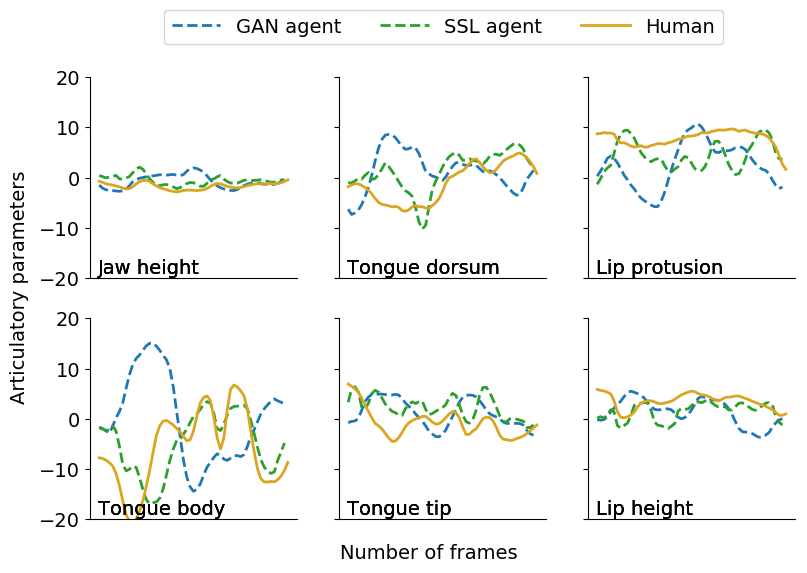

In [4]:
%matplotlib inline
from pathlib import Path
import pickle
import matplotlib.pyplot as plt
import numpy as np
from ssl_agent.ssl_agent import SSLAgent
from lib.dataset_wrapper import Dataset
import torch
import pandas as pd
import torchaudio
from meldataset import MAX_WAV_VALUE
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
import matplotlib
import math

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.serif'] = 'Arial'
matplotlib.rcParams.update({'font.size': 14, 'legend.handleheight':1, 'hatch.linewidth': 1.0,
                           'lines.markersize':5, 'lines.linewidth':2})

agent_folder = Path('../out/ssl_agent')
agent_names = ['test_layer_6_cosine_gan_10', 'test_layer_6_cosine']
agent_labels = ['GAN agent', 'SSL agent']
colors = ['tab:blue', 'tab:green']
item_name = 'item_0280' # odo

def display_param(param, ax, label_curve, linestyle='-', color=None):
    labels = ["Jaw height", "Tongue body", "Tongue dorsum", "Tongue tip", "Lip protusion", "Lip height"]
    labels_short = ['JH', 'TB', 'TD', 'TT', 'LP', 'LH']
    
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    for i, label in enumerate(labels):
        row, col = i%2, i//2
        if color is None:
            color = colors[i]
        ax[row, col].plot(param[:,i], label=label_curve, color=color, linestyle=linestyle)
        ax[row, col].spines['top'].set_visible(False)
        ax[row, col].spines['right'].set_visible(False)
        ax[row, col].set_xticks([])
        ax[row,col].set_ylim(-20,20)
        ax[row,col].text(-0.5,-19, labels[i], fontsize=14)  

cm = 1/2.54
fig, ax = plt.subplots(2, 3, figsize=(22.4*cm,14.04*cm), sharex=True, sharey=True, constrained_layout=True)

for i, agent_name in enumerate(agent_names):
    agent = SSLAgent.reload(str(agent_folder / agent_name))
    dataset_name = agent.config['dataset']['name']
    dataset = Dataset(dataset_name)
    items_sound = dataset.get_items_data(agent.config['dataset']['sound_type'], cut_silences=True, format='.wav')
    items_source = dataset.get_items_data(agent.config['dataset']['source_type'], cut_silences=True, format='.npy')
    items_art = dataset.get_items_data('art_params', cut_silences=True, format='.npy')

    item_sound = items_sound[item_name]
    item_source = items_source[item_name]
    item_art = items_art[item_name]

    out = agent.repeat(item_sound, item_source)
    art_estimated = agent.synthesizer.art_scaler.inverse_transform(out['art_estimated'])
    display_param(art_estimated, ax, label_curve=agent_labels[i], linestyle='--', color=colors[i])

display_param(item_art, ax, label_curve='Human', linestyle='-', color='goldenrod')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
xlabel = plt.xlabel("Number of frames")
ylabel = plt.ylabel("Articulatory parameters")

fig.subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)
big_ax = fig.add_subplot(111, frameon=False)
big_ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
big_ax.set_xlabel("Number of frames", labelpad=5)
big_ax.set_ylabel("Articulatory parameters", labelpad=5)
big_ax.set_position([0.135, 0.12, 0.8, 0.8])  # [left, bottom, width, height]
h, l = ax[0,0].get_legend_handles_labels()
big_ax.legend(h,l, bbox_to_anchor=(.93,1.15), ncol=5, handlelength=2.5)
plt.savefig('/home/engaclew/agent/out/ssl_agent/art_le_monde_de_yoyo.png', dpi=300)
plt.show()